# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

сalls — количество звонков,

minutes — суммарная длительность звонков в минутах,

messages — количество sms-сообщений,

mb_used — израсходованный интернет-трафик в Мб,

is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


В условии написано, что предобработка выполнена значит принимаем, что нет дупликатов, пропущенных значений или неверных типов данных 

## Разбейте данные на выборки

За целевой признак примем столбец is_ultra : «Ультра» — 1, «Смарт» — 0

In [3]:
target = data['is_ultra']
features = data.drop('is_ultra', axis=1)
target.shape, features.shape

((3214,), (3214, 4))

Данных достаточно

In [4]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

Создали валидаицонную выборку в объеме 25% от исходных данных

In [5]:
features_train_test, features_test, target_train_test, target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

Создали тестовую выборку в объёме 25%, оставшиеся данные пойдут на обучение модели

## Исследуйте модели

Выбираем три модели обучения:

Дерево решений - DecisionTreeClassifier

"Случайный лес" - RandomForestClassifier

Логистическая регрессия - LogisticRegression

# DecisionTreeClassifier

In [6]:
best_accuracy = 0
best_depth = 0
for depth in range(2,50):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid,predicted_valid)
    if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_depth = depth
print('best_accuracy = ',best_accuracy)
print('best_depth = ', best_depth)

best_accuracy =  0.7898009950248757
best_depth =  7


# RandomForestClassifier

In [7]:
best_accuracy = 0
best_est = 0
best_depth = 0
for est in range(2,25):
    for depth in range(2,25):
        model = RandomForestClassifier(random_state = 12345,n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        accuracy = accuracy_score(target_valid,predicted_valid)
        if best_accuracy < accuracy:
            best_depth = depth
            best_est = est
            best_accuracy = accuracy
print('best_accuracy = ',best_accuracy)
print('best_depth = ', best_depth)
print('best_est = ',best_est)

best_accuracy =  0.8146766169154229
best_depth =  9
best_est =  19


# LogisticRegression

In [8]:
model = LogisticRegression(random_state = 12345,max_iter= 1000,solver = 'lbfgs' )
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
accuracy= accuracy_score(predicted_valid, target_valid)
print(accuracy)

0.7039800995024875


Из результатов можно сделать вывод, что лучшая точность результатов у RandomForestClassifier, его результат 0.815. Худщей стала модель логистической регрессии, точность которой даже не дотягивает до минимума задачи.

## Проверьте модель на тестовой выборке

Проверю модели в порядка убывания их точности на валидационной выборке

# RandomForestClassifier

In [9]:
model = RandomForestClassifier(random_state = 12345,n_estimators = 19, max_depth = 9)
model.fit(features_train_test, target_train_test)
predicted_test = model.predict(features_test)
print(accuracy_score(target_test,predicted_test))

0.8308457711442786


# DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier(random_state = 12345, max_depth = 7)
model.fit(features_train_test, target_train_test)
predicted_test = model.predict(features_test)
print(accuracy_score(target_test,predicted_test))

0.7827529021558872


# LogisticRegression

In [11]:
model = LogisticRegression(random_state = 12345,max_iter= 1000,solver = 'lbfgs' )
model.fit(features_train_test, target_train_test)
predicted_test = model.predict(features_test)
accuracy= accuracy_score(target_test,predicted_test)
print(accuracy)

0.7412935323383084


Можем заметить что модели расположены по мере убывания точности на тестовой выборке. Можем сделать вывод, что модель случайного леса подходит для данной задачи лучше всего

## (бонус) Проверьте модели на адекватность

Найдем какой тариф преобладает

is_ultra
0    0.693528
1    0.306472
Name: proportion, dtype: float64


<Axes: xlabel='is_ultra'>

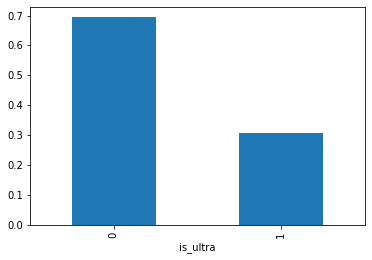

In [12]:
class_frequency = data['is_ultra'].value_counts(normalize=True) # < напишите код здесь >)
print(class_frequency)
class_frequency.plot(kind='bar') 

Получили что тариф смарт используют порядка 69% пользоваталей.

Проанализируем частоты классов в результатах предсказаний случайного дерева

0    0.808458
1    0.191542
Name: proportion, dtype: float64


<Axes: >

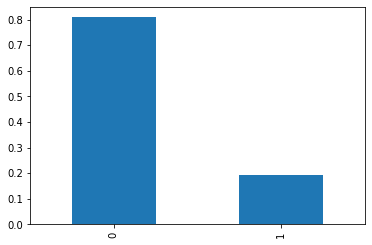

In [13]:
model = RandomForestClassifier(random_state = 12345,n_estimators = 19, max_depth = 9)
model.fit(features_train, target_train)

predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True) 
print(class_frequency)
class_frequency.plot(kind='bar') 

Создадим константную модель: любому объекту прогнозирует 1

In [14]:
target_pred_constant = pd.Series(1, index=target.index)
print(accuracy_score(target, target_pred_constant)) 

0.30647168637212197


Наша модель работает лучше константы, следовательно модель прошла на адекватность

# Вывод

Были проверены три модели:  дерево решений, случайный лес и логистическая регрессия. Наибольшая точность 0.81 достигается при использовании модели RandomForestClassifier, а логистическая регрессия в свою очередь является плохо обучаемой моделью.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>В нашей задаче модель логистической регресии оказалась плохо обучена.</font>
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
